# Your own single layer perceptron

## Exercise 6

In this notebook you will implement and train your own single layer perceptron classifier using **Wiscosin Breast Cancer dataset**.

### Dataset

Run the cells to load feature matrix and label vector and split the data into training and validation set.

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# load feature matrix and label vector
data = datasets.load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
y = data.target

print('Features dim: ', X.shape)
print('Labels dim: ', y.shape)
print('We have {} samples and {} features.'.format(X.shape[0],X.shape[1]))
print('We have labels: ', np.unique(y))

Features dim:  (569, 30)
Labels dim:  (569,)
We have 569 samples and 30 features.
We have labels:  [0 1]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training samples: ', y_train.shape[0])
print('Validation samples: ', y_test.shape[0])

Training samples:  455
Validation samples:  114


### Architecture

Our single layer perceptron will consist of

- A single linear layer that takes in 30 inputs and gives out 1 output
- A sigmoid activation function to add that non-linear twist

We will minimise **mean squared error loss**, , a common and efficient measure of prediction error.

The functions below take care of implementing these architectural elements, along with a handy function to calculate a generic derivative. Give them a quick look-over and run the cell when you're ready. The foundations of your model are all set!

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Linear layer - we do not have a bias here for simplicity
def linear(x,w):
    return np.matmul(x, w)

# Mean squared error loss
def mse(y, y_pred):
    return np.mean(np.square(y-y_pred))

# A general derivative of a function (no need to implement individual derivatives)
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

### Theory

The single layer perceptron is composed of one **linear layer** of neurons that can be expressed as
$$z=Xw$$
where $X$ is the feature matrix, $w$ are the parameters of the network and $z$ is the output of the linear layer. NOTE: to keep things simple, we're not going to implement the bias term in this exercise.

The output of the linear layer then paasses trhough the activation function, denoted by **sigmoid** $\sigma$:

$$p=\sigma(z)$$

The output $p$ is essentially the predicted probability of the positive class 1.

The goal here is to find the network parameter vector $w$ by minimizing the **minimising the mean squared error loss** between predicted probability $p$ and the actual labels $y$
$$loss=\sum_{n=1}^N(y_n-p_n)^2$$

We can iteratively **update the weight vector** $w$ using gradient descent equation:
$$w^{iter+1}=w^{iter}-\eta \frac{\partial loss}{\partial w}$$
where $w^{iter}$ is estimated weight vector at iteration $iter$ and $\eta$ is the learning rate.

As we've learned in the lecture, for the MSE loss and sigmoid activation, the derivative is calculated as follows:

$$\frac{\partial loss}{\partial w}=(y-p)\sigma'(z)X$$

Take a moment to absorb these equations, they'll be the engine behind your perceptron!

### Training

Complete the code below to train the single layer perceptron. The learning rate and number of epoch has been already set for you. We start by initialising the weight vector `w` to random values.

**Task 6.1:** Implement the forward pass. To do that
* evaluate the linear layer for the training feature matrix `X_train`
* pass the result through the sigmoid activation

**Task 6.2:** Calculate the training loss. There is also code to save it for plotting after we finished training.

**Task 6.3:** Implement the backward pass. To do that you need to implement the calculation of the gradients of the
* loss
* activation
* linear layer
Code to multiply them together using the chain rule is there for you.

**Task 6.4:** Implement the update of the network weights.

Once you successfully complete the code, run it. You will see how the loss is evolving.

In [ ]:
# set learning rate
lr = 0.01

# set number of epochs
epochs = 20

# initialize the weights randomly with mean 0
w = 2*np.random.random(np.array(X).shape[1]) - 1
print('Weight vector dimension: ', w.shape)

# training loop
train_loss = []
for iter in range(epochs):

    # forward pass - predict network output
    # implement linear layer
    z = None
    # predict output probabilities
    p_pred = None

    # calculate and save training loss
    loss = None
    train_loss.append(loss)

    print('Epoch {}: MSE = {}'.format(iter,np.round(loss,4)))

    # backward pass - calculate gradients
    # gradient of the loss: error between predicted and true training labels
    loss_grad = None
    # gradient of activation: derivative of sigmoid
    act_grad = None
    # gradient of linear layer: feature matrix
    lin_grad = None
    # multiply gradients (chain rule)
    grad = np.matmul(loss_grad*act_grad,lin_grad)

    # update the weights of the network
    w -= None

# plot training loss during epochs
plt.plot(train_loss)

Weight vector dimension:  (30,)


TypeError: ignored

**Task 6.5:** Evaluate the accuracy of the trained network on training and test set. To do that
* implement the forward pass of the network on training set to calculate the predicted labels (code given)
* evaluate accuracy on the training set using the given function `accuracy`
* implement the forward pass of the network in test set
* evaluate accuracy for the test set

In [ ]:
def accuracy(y,y_pred):
    a = np.sum(y==y_pred)/y.shape[0]
    return a

# predict on training set
y_pred = np.around(sigmoid(linear(X_train,w)))
acc_train = None
print('Train accuracy: ', np.round(acc_train,2))

# predict on test set
y_pred_test = None
acc_test = None
print('Test accuracy: ', np.round(acc_test,2))

Train accuracy:  0.97
Test accuracy:  0.91


### Cross Entropy Loss

You already know that binary cross-entropy loss is more common to use for binary classification rather than MSE loss. **Binary Cross-entropy loss** is given by
$$BCELoss=\sum_{n=1}^N(-y_n \log(p_n)-(1-y_n)\log(1-p_n))$$

We have used MSE loss in the lecture instead, because it is easier to calculate the derivatives. However, the derivative of BCE loss with sigmoid activation with respect to the weights actually results in a much simple derivative:

$$\frac{\partial BCELoss}{\partial w}=(y-p)X$$

**Task 6.6 (optional):** Derive the derivative of cross entropy loss. (Solution not given for this task)

**Task 6.7:** Complete the implementation of BCE loss in the cell below.

In [ ]:
# Binary Cross-entropy loss
def BCE(y,p):
    return -np.mean(np.log(p)*y_train + None)

**Task 6.8:** Implement the gradient of the binary cross entropy loss and train the single layer perceptron using the code below.

Epoch 0: BCE = 0.5745
Epoch 1: BCE = 0.2917
Epoch 2: BCE = 0.2335
Epoch 3: BCE = 0.2032
Epoch 4: BCE = 0.1832
Epoch 5: BCE = 0.1685
Epoch 6: BCE = 0.1572
Epoch 7: BCE = 0.1481
Epoch 8: BCE = 0.1406
Epoch 9: BCE = 0.1343
Epoch 10: BCE = 0.129
Epoch 11: BCE = 0.1243
Epoch 12: BCE = 0.1203
Epoch 13: BCE = 0.1167
Epoch 14: BCE = 0.1135
Epoch 15: BCE = 0.1107
Epoch 16: BCE = 0.1081
Epoch 17: BCE = 0.1057
Epoch 18: BCE = 0.1036
Epoch 19: BCE = 0.1016
Train accuracy:  0.96
Test accuracy:  0.95


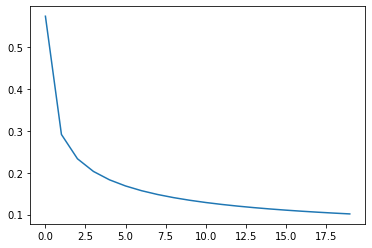

In [ ]:
# set learning rate
lr = 0.001

# set number of epochs
epochs = 20

# initialize the weights randomly with mean 0
w = 2*np.random.random(np.array(X).shape[1]) - 1

# training loop
train_loss = []
for iter in range(epochs):

    # forward pass - predict labels
    z = linear(X_train,w)
    p_pred = sigmoid(z) # probabilities

    # calculate and save training loss (need to thredhol)
    loss = BCE(y_train,p_pred)
    train_loss.append(loss)

    print('Epoch {}: BCE = {}'.format(iter,np.round(loss,4)))

    # backward pass - calculate gradients
    # error
    error = p_pred-y_train
    # gradient
    grad = np.matmul(error,X_train)

    # update the weights of the network
    w -= grad * lr

plt.plot(train_loss)

# predict on training set
y_pred = np.around(sigmoid(linear(X_train,w)))
acc_train = accuracy(y_train,y_pred)
print('Train accuracy: ', np.round(acc_train,2))

# predict on test set
y_pred_test = np.around(sigmoid(linear(X_test,w)))
acc_test = accuracy(y_test,y_pred_test)
print('Test accuracy: ', np.round(acc_test,2))